<a href="https://colab.research.google.com/github/Aadi-Vars/ML/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
raw_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Insurance Forcast/insurance.csv")

In [ ]:
raw_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
raw_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


It can be seen the min age is 18 year there might be possible that there would not be any insurance policy for people less than 18 years.

##Data analytsis and visualization

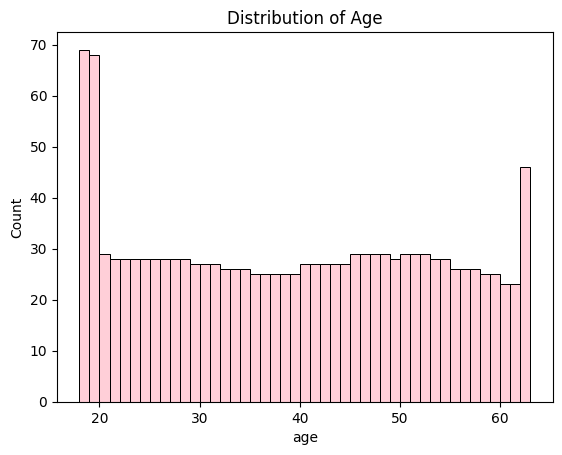

In [ ]:
sns.histplot(raw_df.age,bins=np.arange(18,64),color="pink");
plt.title("Distribution of Age");

It can be observed that the distribution of age is uniform except for the age group 18-20 this may be possible that there might be some special policy for this age group that's why as soon as people become eligible they get the insurance.

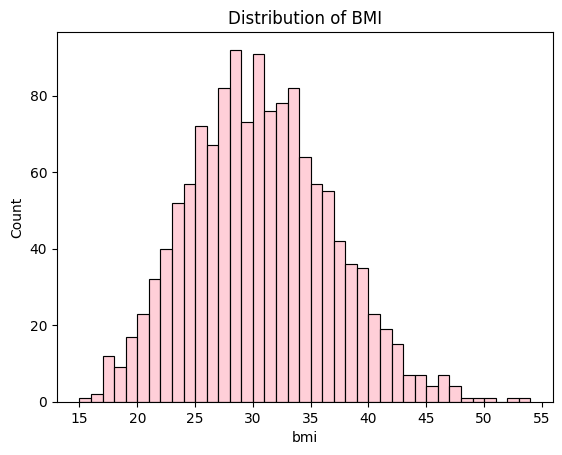

In [ ]:
sns.histplot(raw_df.bmi,color="pink",bins=np.arange(15,55));
plt.title("Distribution of BMI");

It can be seen the the BMI follows Gaussian Distribution.The major group of people are centred around BMI==30.

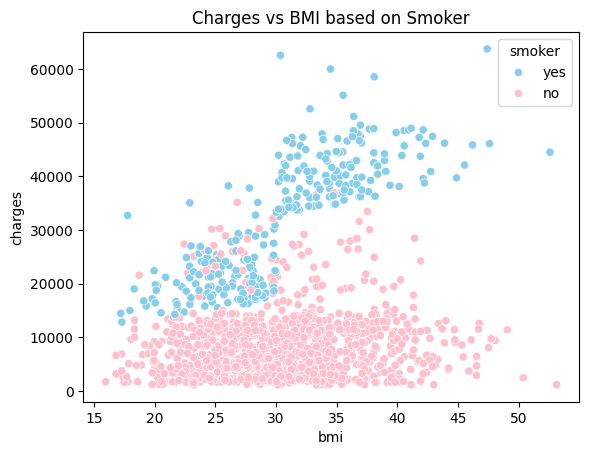

In [ ]:
sns.scatterplot(raw_df,x="bmi",y="charges",color="pink",hue="smoker",palette=("skyblue","pink"));
plt.title("Charges vs BMI based on Smoker");

It can be seen that for smokers the BMI has significant weight as compared to non smoker

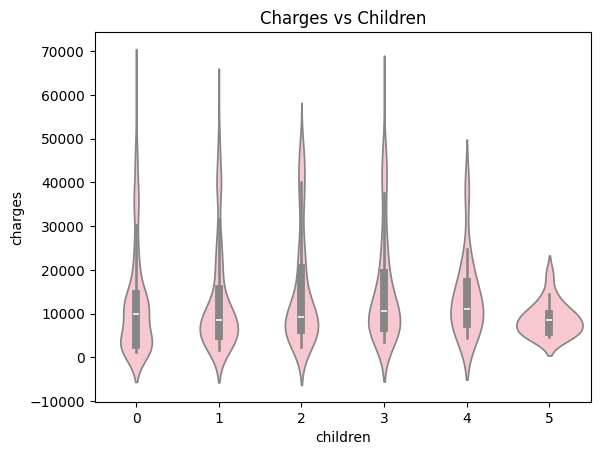

In [ ]:
sns.violinplot(raw_df,x="children",y="charges",color="pink");
plt.title("Charges vs Children");

From this voilin graph we can see that there is negligible effect of number of children on the charges as the width of voilin chart is more around 1000 for each children

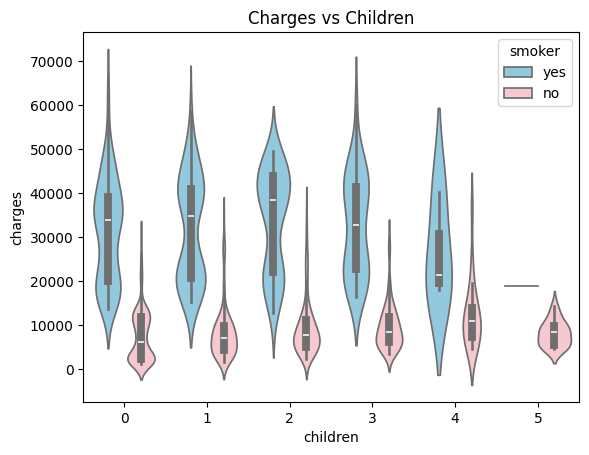

In [ ]:
sns.violinplot(raw_df,x="children",y="charges",hue="smoker",palette=("skyblue","pink"));
plt.title("Charges vs Children");

If you are a smoker thee number of children also have a significant weight in calculating the charges

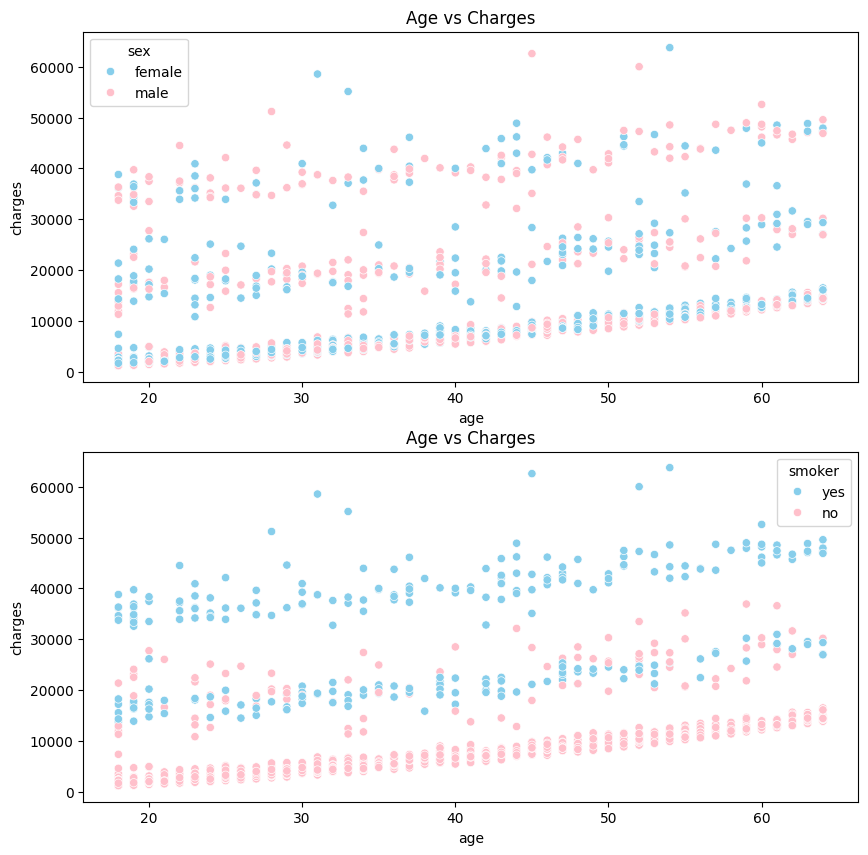

In [ ]:

plt.figure(figsize=(10,10));
plt.subplot(2,1,1);
sns.scatterplot(raw_df,x="age",y="charges",hue="sex",palette=("skyblue","pink"));
plt.title("Age vs Charges");
plt.subplot(2,1,2);
sns.scatterplot(raw_df,x="age",y="charges",hue="smoker",palette=("skyblue","pink"));
plt.title("Age vs Charges");

It can be seen here that the charges of somker is always high irrespective of their age as compared to non smoker.

In terms of age, charges does not affect as much in accordance to their sex.

For the smoker we need more classification as the charges of smokers varies irrespective of their age

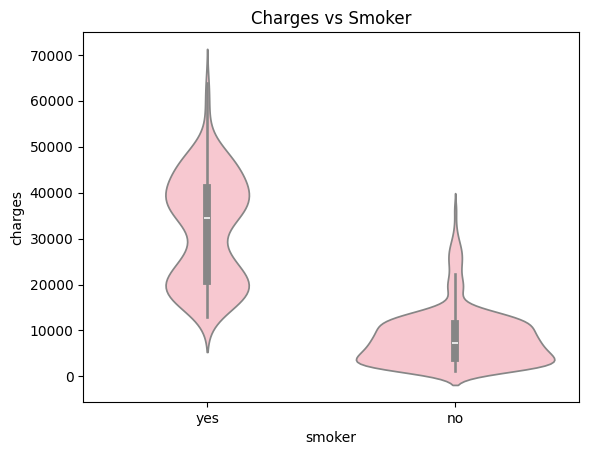

In [ ]:
sns.violinplot(raw_df,x="smoker",y="charges",color="pink");
plt.title("Charges vs Smoker");

Here also the charges for smoker is high as compared to non smoker

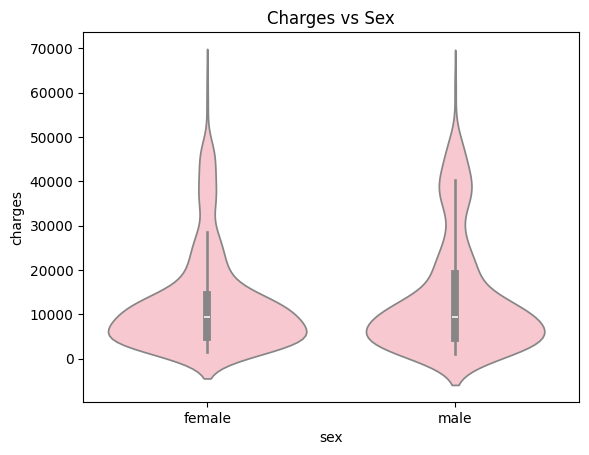

In [ ]:
sns.violinplot(raw_df,x="sex",y="charges",color="pink");
plt.title("Charges vs Sex");

From this graph it is clear that sex may also have a weightage in predicting the charges as charges are more evenly distributed for males as compared to females.

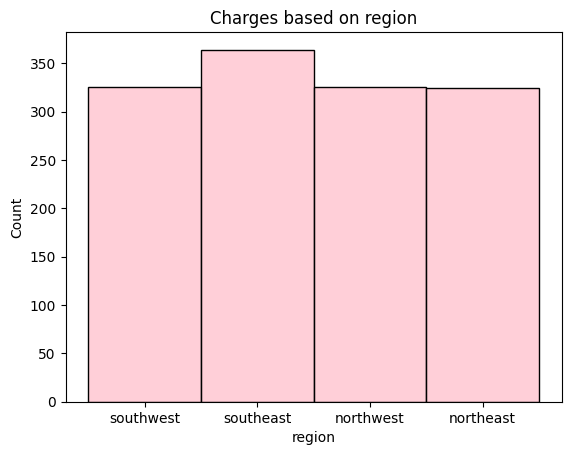

In [ ]:
sns.histplot(raw_df,x="region",color="pink");
plt.title("Charges based on region");

Thus we have the uniform distribution of region data in our data set this can implies that the insurance policy is same for all the regions

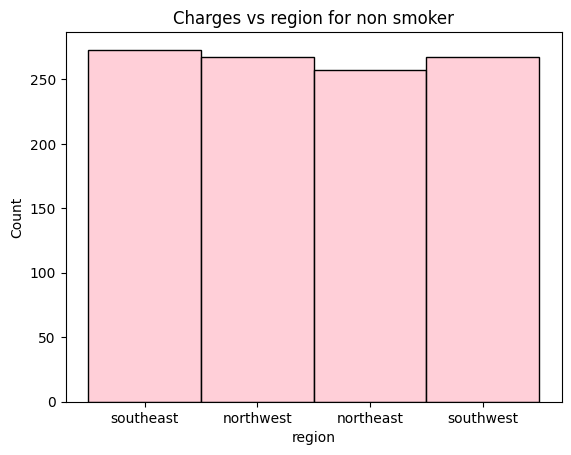

In [ ]:
sns.histplot(raw_df[raw_df.smoker=="no"],x="region",color="pink");
plt.title("Charges vs region for non smoker");

From this graph we can see that the charges for non smokers does not have that much variation according to their regions

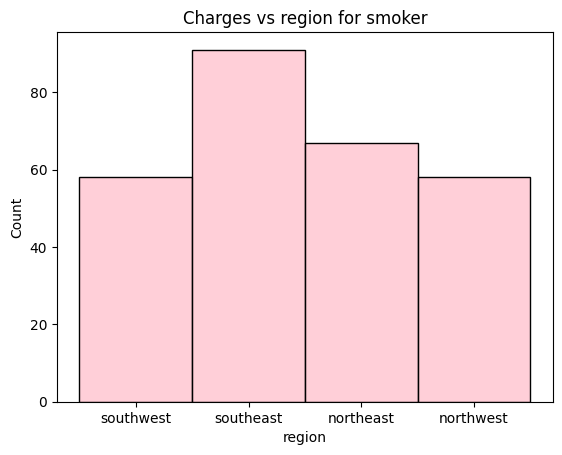

In [ ]:
sns.histplot(raw_df[raw_df.smoker=="yes"],x="region",color="pink");
plt.title("Charges vs region for smoker");

From this graph we can see that charges for smokers much depends upon the region from which they are belonging

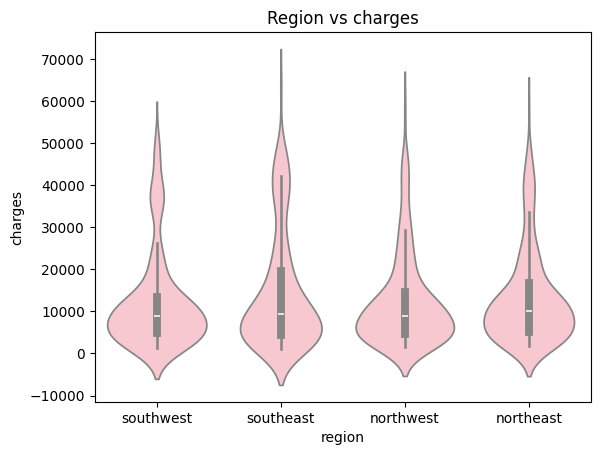

In [ ]:
sns.violinplot(raw_df,x="region",y="charges",color="pink");
plt.title("Region vs charges");

It can be seen that individually the charges for region has not that much variation.

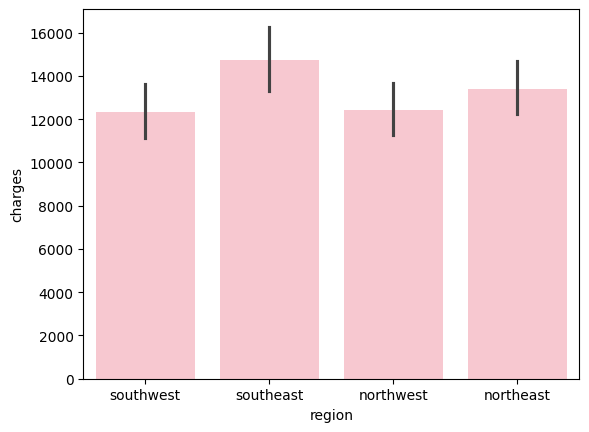

In [ ]:
sns.barplot(raw_df,x="region",y="charges",color="pink");

It can be seen that southeast and northeast has high average charges as compared to southwest and northwest. Thus there will be some weight for southeast and northeast region also.

##Data preprocessing

In [ ]:
categorical_cols=["sex","smoker","region"]
integer_cols=[i for i in raw_df.columns if i not in categorical_cols]

In [ ]:
sex_code={"female":0,"male":1}
smoker_code={"yes":1,"no":0}
raw_df["sex_code"]=raw_df.sex.map(sex_code)
raw_df["smoker_code"]=raw_df.smoker.map(smoker_code)
integer_cols.extend(("smoker_code","sex_code"))

In [ ]:
integer_cols

['age', 'bmi', 'children', 'charges', 'smoker_code', 'sex_code']

In [ ]:

#one hot encoding of region
from sklearn.preprocessing import OneHotEncoder
encoded_df=OneHotEncoder();
encoded_df.fit(raw_df[["region"]]);
data=encoded_df.transform(raw_df[["region"]]).toarray()

In [ ]:
encoded_df.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
region_values=np.sort(raw_df.region.unique())
val=np.concatenate((region_values,))
#final list for integer columns
integer_cols=np.concatenate((val,integer_cols))
val

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [ ]:

#adding encoded data to dataframe
raw_df[val]=data
raw_df

,age,sex,bmi,children,smoker,region,charges,sex_code,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [ ]:
raw_df.describe()

,age,bmi,children,charges,sex_code,smoker_code,northeast,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:

#Standard scale of columns
from sklearn.preprocessing import StandardScaler
numerical_cols=["age","bmi"]
scaler=StandardScaler()
scaler.fit(raw_df[numerical_cols])
scale_input=scaler.transform(raw_df[numerical_cols])
scale_input

array([[-1.43876426, -0.45332   ],
       [-1.50996545,  0.5096211 ],
       [-0.79795355,  0.38330685],
       ...,
       [-1.50996545,  1.0148781 ],
       [-1.29636188, -0.79781341],
       [ 1.55168573, -0.26138796]])

In [ ]:

#creating new dataframe with standard scaled data
raw_df2=raw_df.copy()
raw_df2[["age","bmi"]]=scale_input

In [ ]:
raw_df2

,age,sex,bmi,children,smoker,region,charges,sex_code,smoker_code,northeast,northwest,southeast,southwest
0,-1.438764,female,-0.453320,0,yes,southwest,16884.92400,0,1,0.0,0.0,0.0,1.0
1,-1.509965,male,0.509621,1,no,southeast,1725.55230,1,0,0.0,0.0,1.0,0.0
2,-0.797954,male,0.383307,3,no,southeast,4449.46200,1,0,0.0,0.0,1.0,0.0
3,-0.441948,male,-1.305531,0,no,northwest,21984.47061,1,0,0.0,1.0,0.0,0.0
4,-0.513149,male,-0.292556,0,no,northwest,3866.85520,1,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,male,0.050297,3,no,northwest,10600.54830,1,0,0.0,1.0,0.0,0.0
1334,-1.509965,female,0.206139,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,-1.509965,female,1.014878,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,-1.296362,female,-0.797813,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [ ]:

#setting targets and inputs columns
target_cols="charges"
input_cols=[i for i in raw_df2.columns if i!="charges" and i in integer_cols]

In [ ]:

#splitting dataframe based on Smoker and non-smoker
smoker_df=raw_df2[raw_df2.smoker_code==1]
non_smoker_df=raw_df2[raw_df2.smoker_code==0]

##Models for complete data

In [ ]:

#function to predict the values
def prediction(listy):
    scale_input=scaler.transform([[listy[0],listy[1]]]);
    listy[0],listy[1]=scale_input[0][0],scale_input[0][1];
    return model.predict([listy]);

In [ ]:

#function for showing weight of columns
def weights(cols,m):
    df=pd.DataFrame({
    "Inputs":cols,
    "Weight": m.coef_})
    return df

In [ ]:
#calculating RMSE
def loss(prediction,targets):
    return np.sqrt(np.mean(np.square(prediction-targets)))

In [ ]:
#splitting data into train and test dataframe
from sklearn.model_selection import train_test_split
inputs_train,inputs_test,targets_train,targets_test=train_test_split(raw_df2[input_cols],raw_df2[target_cols],test_size=0.2,random_state=42)
smoker_inputs_train,smoker_inputs_test,smoker_targets_train,smoker_targets_test=train_test_split(smoker_df[input_cols],smoker_df[target_cols],test_size=0.1,random_state=42)
non_smoker_inputs_train,non_smoker_inputs_test,non_smoker_targets_train,non_smoker_targets_test=train_test_split(non_smoker_df[input_cols],non_smoker_df[target_cols],test_size=0.2,random_state=42)

In [ ]:

#creating model for complete dataframe
from sklearn.linear_model import LinearRegression
model=LinearRegression();
model.fit(inputs_train,targets_train);

In [ ]:
predic=model.predict(inputs_train)

In [ ]:
print(weights(input_cols,model))

        Inputs        Weight
0          age   3609.149018
1          bmi   2054.885063
2     children    425.278784
3     sex_code    -18.591692
4  smoker_code  23651.128856
5    northeast    459.585244
6    northwest     88.907918
7    southeast   -198.279052
8    southwest   -350.214110


In [ ]:
loss(predic,targets_train)

6105.545160099847

In [ ]:
test_predic=model.predict(inputs_test)

In [ ]:
print(loss(test_predic,targets_test));

5796.284659276274


In [ ]:
print(prediction([19,26,0,1,0,0,0,1,0]))

[1039.26972293]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##Model with considering only smoker data

In [ ]:

#creating model for smokers
smoker_model=LinearRegression()
smoker_model.fit(smoker_inputs_train,smoker_targets_train);

In [ ]:
smoker_predic=smoker_model.predict(smoker_inputs_train);

In [ ]:
loss(smoker_predic,smoker_targets_train)

5677.676965091691

RSME for smoker model is less as compared to RSME of  model made for both smoker and non-smoker

In [ ]:
smoker_test_predic=smoker_model.predict(smoker_inputs_test);
print(loss(smoker_test_predic,smoker_targets_test));

5648.510201485733


In [ ]:
print(weights(input_cols, smoker_model))

        Inputs       Weight
0          age  3659.326973
1          bmi  8831.988187
2     children   163.353934
3     sex_code  -358.572039
4  smoker_code     0.000000
5    northeast   575.174037
6    northwest   207.267951
7    southeast  -877.011739
8    southwest    94.569751


##Model for non-smoker

In [ ]:

#creating model for non-smoker
non_smoker_model=LinearRegression()
non_smoker_model.fit(non_smoker_inputs_train,non_smoker_targets_train);

In [ ]:
non_smoker_predic=non_smoker_model.predict(non_smoker_inputs_train)
loss(non_smoker_predic,non_smoker_targets_train)

4625.590577009961

In [ ]:
non_smoker_test_predic=non_smoker_model.predict(non_smoker_inputs_test);
print(loss(non_smoker_test_predic,non_smoker_targets_test));

4363.447114574138


RSME is again less than the RSME of the model made for both smoker and non smoker

In [ ]:
print(weights(input_cols,non_smoker_model))

        Inputs        Weight
0          age  3.666440e+03
1          bmi  2.135660e+02
2     children  5.940527e+02
3     sex_code -5.595075e+02
4  smoker_code -1.136868e-13
5    northeast  7.878822e+02
6    northwest  1.486344e+02
7    southeast -2.899524e+02
8    southwest -6.465642e+02


Hence using separate models for smoker and non smoker is beneficial for the prediction of charges

##Prediction for inputs

In [ ]:
def final_prediction(listy):
    scale_input=scaler.transform([[listy[0],listy[1]]]);
    listy[0],listy[1]=scale_input[0][0],scale_input[0][1];
    if listy[4]==1: #smoker
      return smoker_model.predict([listy]);
    else: #non-smoker
      return non_smoker_model.predict([listy]);

In [ ]:
print(final_prediction([19,26,0,1,0,0,0,1,0])) #non-smoker

[1743.745676]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(prediction([19,26,0,1,1,0,0,1,0]))

[24690.39857869]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
